In [76]:
import pandas as pd

In [77]:
def makeResultDF(alg, num=0):
    retdf = None
    if alg == "dmc":
        path = "trained_models/uno_dmc_cuda_result/logs.csv"
        df = pd.read_csv(path)

        retdf = df["mean_episode_return_1"]
    else:
        numk = num*1000
        if num > 50:
            numk = f"{numk}_cuda"
        path = f"trained_models/uno_{alg}_{numk}_result/performance.csv"

        retdf = pd.read_csv(path)

        retdf.rename({"reward": alg.lower()}, axis=1, inplace=True)
    return retdf

In [78]:
def plotDQNandNFSP(num):
    df_dqn = makeResultDF("dqn", num)
    df_nfsp = makeResultDF("nfsp", num)

    extracted_col = df_nfsp["nfsp"]
    df_combined = pd.concat([df_dqn, extracted_col], axis=1)

    plot = df_combined.plot(x='episode', kind='line', grid=True, figsize=(10, 6))
    plot.set_xlabel('episode', fontsize=16)
    plot.set_ylabel('reward', fontsize=16)

    file_name = f"training_dqn_nfsp"
    plot.get_figure().savefig(f"results/{file_name}.pdf")

In [79]:
def plotDMC():
    path = "trained_models/uno_dmc_cuda_result/logs.csv"
    df = pd.read_csv(path)

    plot = df["mean_episode_return_1"].plot(kind='line', grid=True, figsize=(10, 6))
    plot.set_xlabel('time steps', fontsize=16)
    plot.set_ylabel('mean episode return', fontsize=16)

    file_name = f"training_dmc"
    plot.get_figure().savefig(f"results/{file_name}.pdf")

In [80]:
def plotIndividual(alg, num):
    df = makeResultDF(alg, num)
    plot = df.plot(x='episode', kind='line', grid=True, legend=False, figsize=(10, 6))
    plot.set_xlabel('episode', fontsize=16)
    plot.set_ylabel('reward', fontsize=16)

    file_name = f"training_{alg}_{num}k"
    return [plot, file_name]

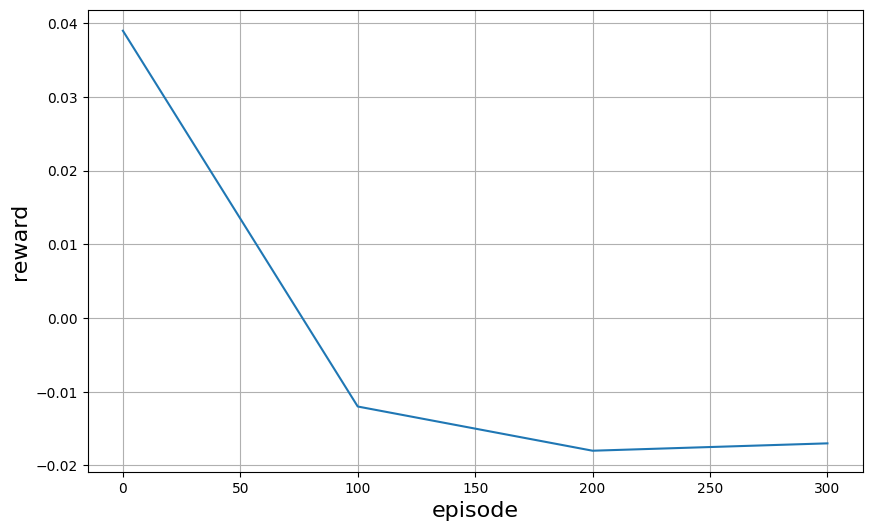

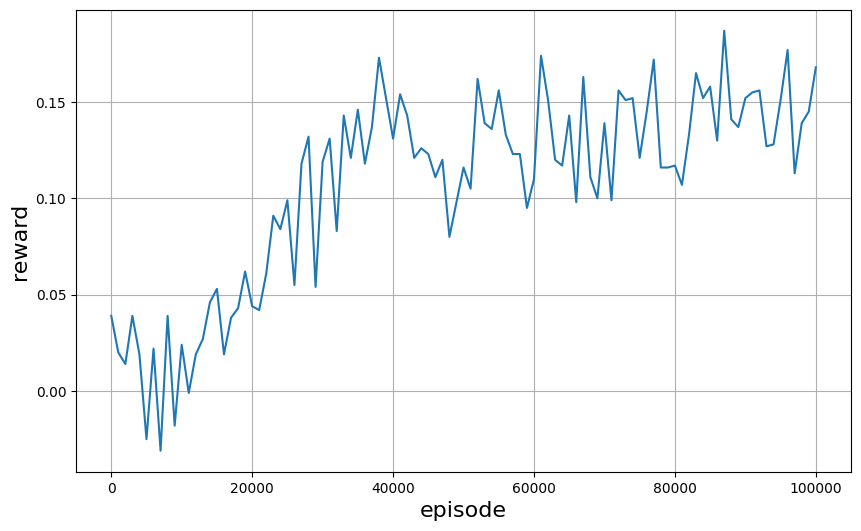

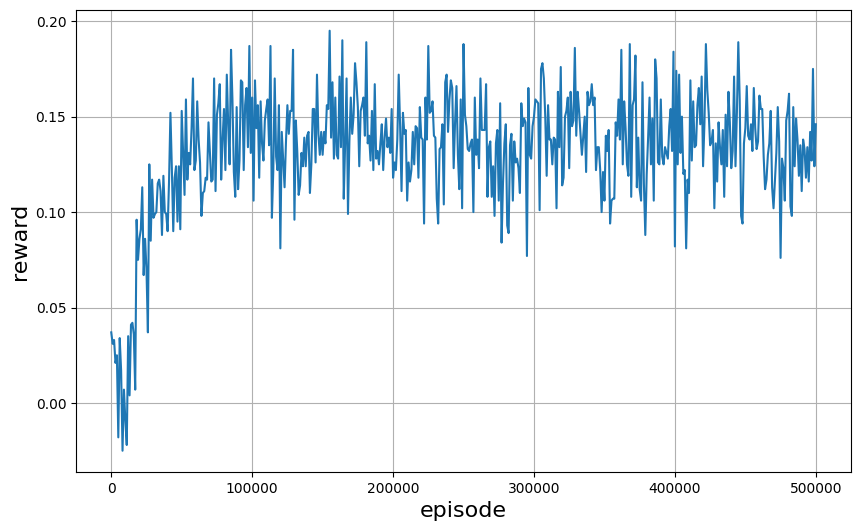

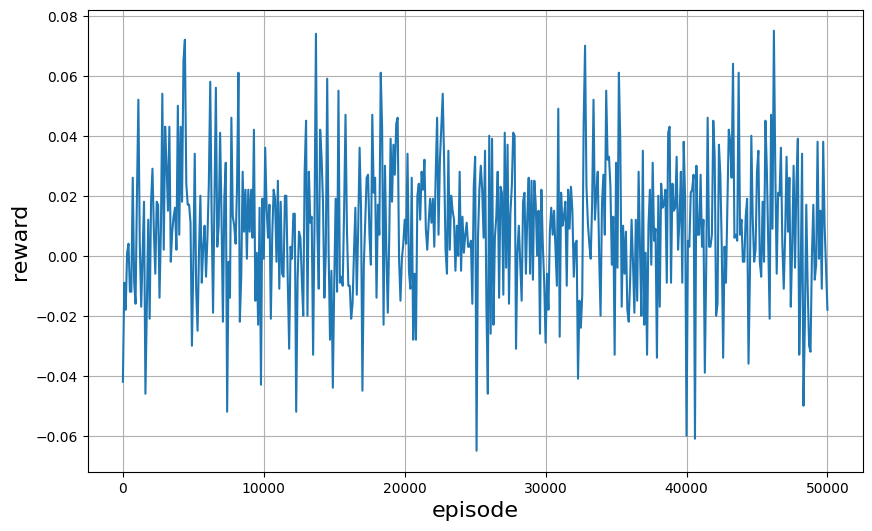

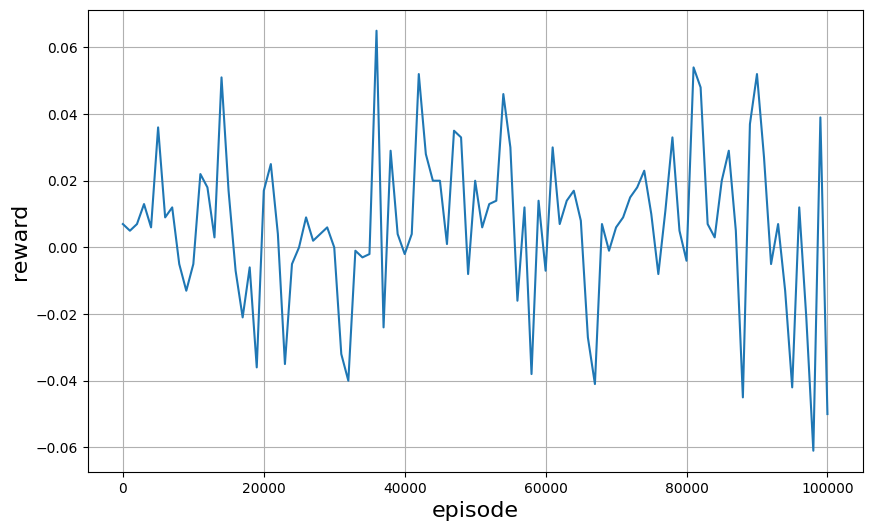

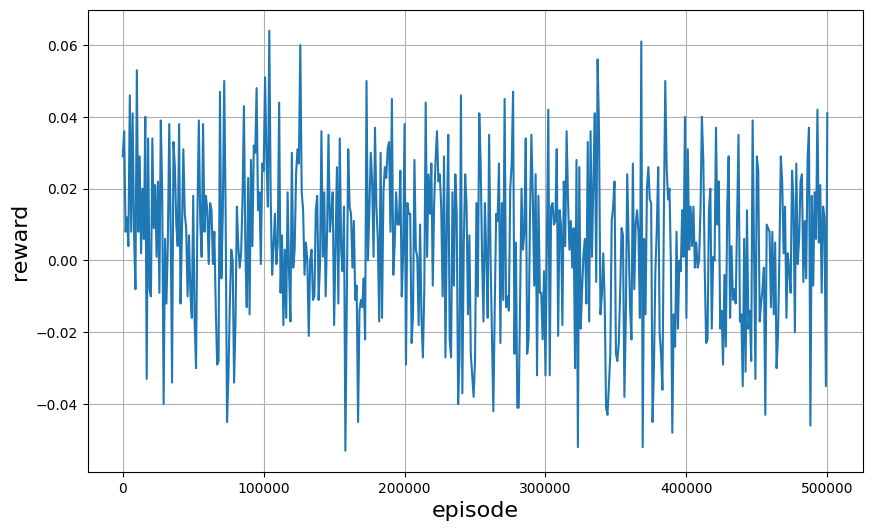

In [81]:
plots = [
	plotIndividual("dqn", 50), # TODO: create again with correct data
	plotIndividual("dqn", 100),
	plotIndividual("dqn", 500),
	plotIndividual("nfsp", 50),
	plotIndividual("nfsp", 100),
	plotIndividual("nfsp", 500)
]

for plot, file_name in plots:
	plot.get_figure().savefig(f"results/{file_name}.pdf")

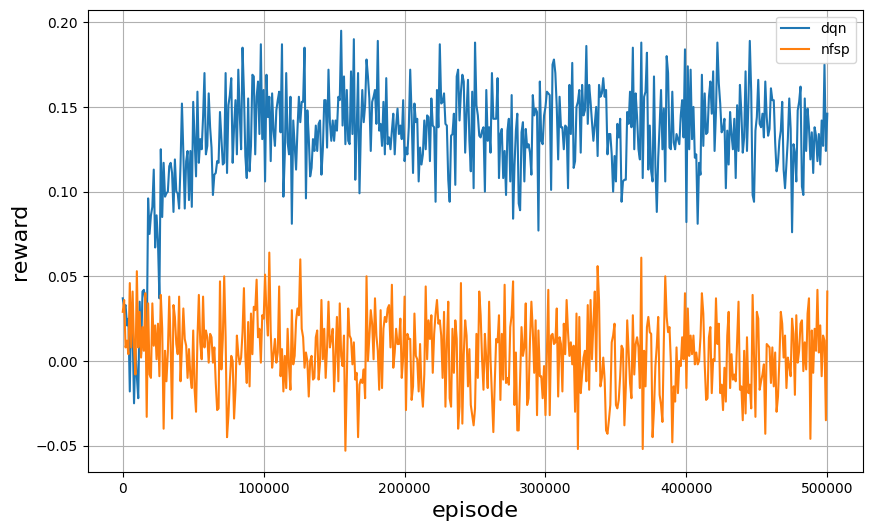

In [82]:
plotDQNandNFSP(500)

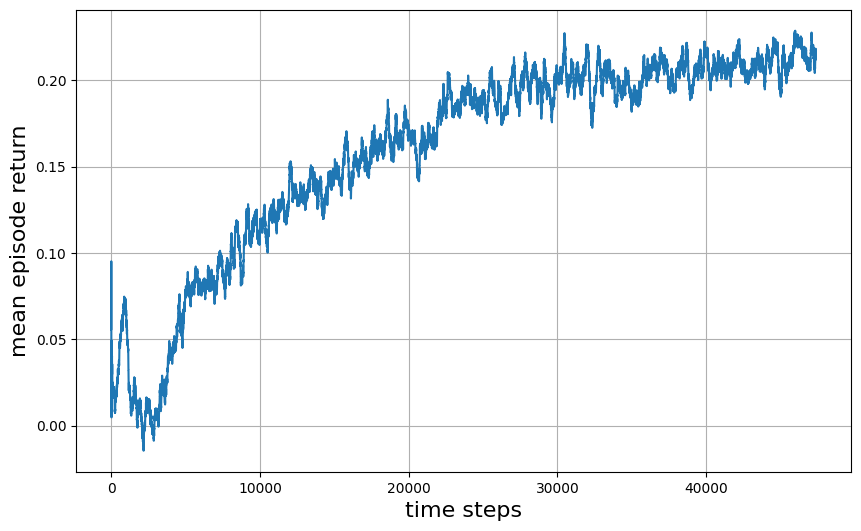

In [83]:
plotDMC()